In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"
plt.rcParams["font.weight"] = "bold"

import json

In [63]:
with open("output/None.log.json") as fp:
    log = json.load(fp)

In [64]:
train_log = [item for item in log if item["mode"] == 'train']
val_log = [item for item in log if item["mode"] == 'val']


In [65]:
train_log[0]

{'mode': 'train',
 'epoch': 1,
 'iter': 20,
 'lr': 0.0001,
 'memory': 8205,
 'data_time': 0.13937,
 'loss_rpn_cls': 0.67773,
 'loss_rpn_bbox': 0.01085,
 's0.loss_cls': 0.43706,
 's0.acc': 90.58838,
 's0.loss_bbox': 0.02319,
 's1.loss_cls': 0.2752,
 's1.acc': 75.58105,
 's1.loss_bbox': 0.00558,
 's2.loss_cls': 0.12067,
 's2.acc': 98.13721,
 's2.loss_bbox': 0.00083,
 'loss': 1.55113,
 'time': 1.39496}

In [66]:
def plot_metric(log, metrics):
    for metric in metrics:
        y = [value[metric] for value in log]
        x = range(len(y))
        plt.plot(x, y)

def save_fig(title: str):
    title = title.lower().replace(" ", "_")
    plt.savefig(f"./output/{title}.png")
    plt.show()
    return

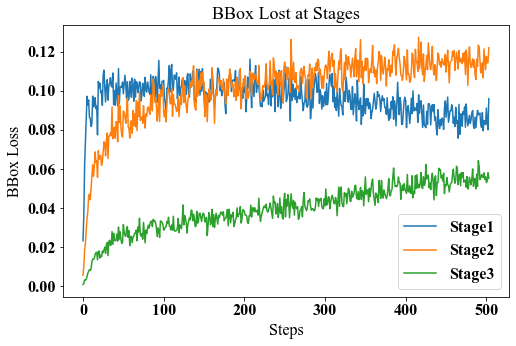

In [67]:
title = "BBox Lost at Stages"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["s0.loss_bbox", "s1.loss_bbox", "s2.loss_bbox"])
plt.xlabel("Steps")
plt.ylabel("BBox Loss")
plt.legend(["Stage1", "Stage2", "Stage3"])
plt.title(title, fontdict={"fontsize":18})
save_fig(title)

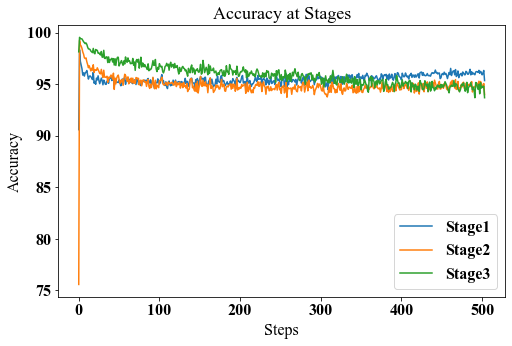

In [74]:
title = "Accuracy at Stages"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["s0.acc", "s1.acc", "s2.acc"])
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.legend(["Stage1", "Stage2", "Stage3"], )
plt.title(title, fontdict={"fontsize":18})
save_fig(title)

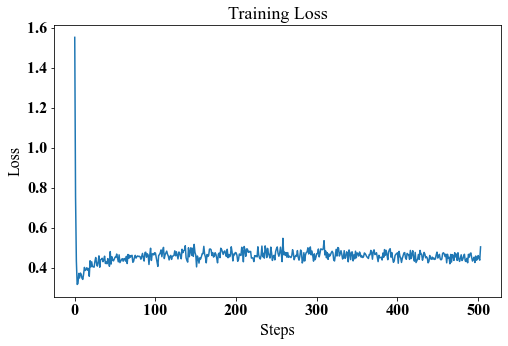

In [71]:
title = "Training Loss"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["loss"])
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title(title, fontdict={"fontsize":18})
save_fig(title)

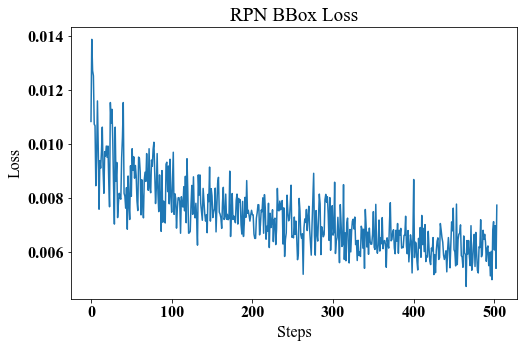

In [72]:
title = "RPN BBox Loss"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["loss_rpn_bbox"])
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title(title)
save_fig(title)

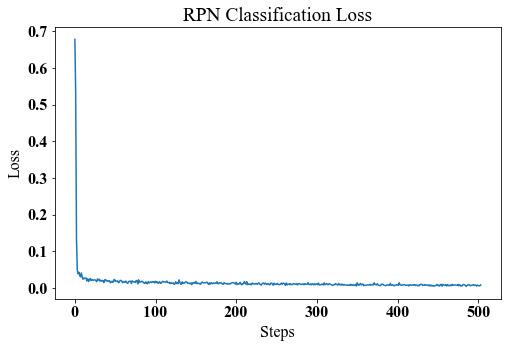

In [73]:

title = "RPN Classification Loss"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["loss_rpn_cls"])
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title(title)
save_fig(title)

In [75]:
val_df = pd.DataFrame(val_log)
val_df.to_csv("val-log.csv")

In [80]:
val_df.head()

,mode,epoch,iter,lr,bbox_mAP,bbox_mAP_50,bbox_mAP_75,bbox_mAP_s,bbox_mAP_m,bbox_mAP_l
1,val,1,858,0.00246,0.442,-1,-1,0.0,0.133,0.523
2,val,2,858,0.00213,0.459,-1,-1,0.0,0.223,0.531
3,val,3,858,0.00233,0.484,-1,-1,0.0,0.143,0.568
4,val,4,858,0.00188,0.488,-1,-1,0.0,0.228,0.576
5,val,5,858,0.00157,0.504,-1,-1,0.0,0.171,0.591


In [85]:
val_df = pd.read_csv("val.log.csv", index_col=0)
val_df.index += 1

In [86]:
def plot_metric(log_df, metrics):
    for metric in metrics:
        plt.plot(log_df[metric])

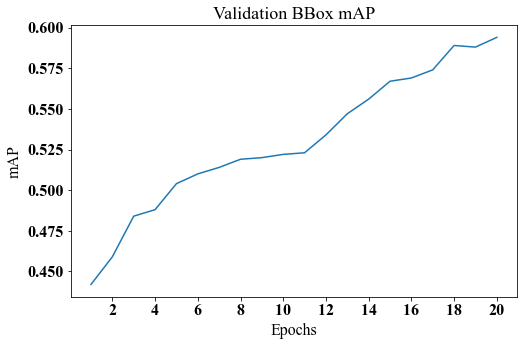

In [88]:
title = "Validation BBox mAP"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title(title, fontdict={"fontsize":18})
save_fig(title)

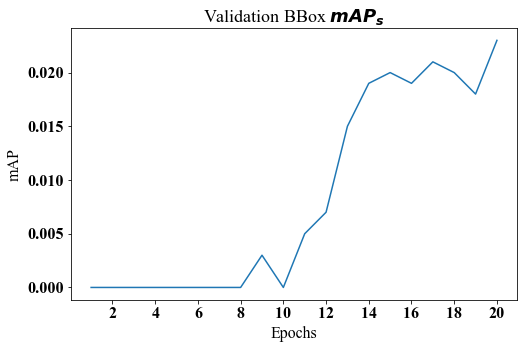

In [89]:
title = "Validation BBox mAP_s"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP_s"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Validation BBox $mAP_s$", fontdict={"fontsize":18})
save_fig(title)

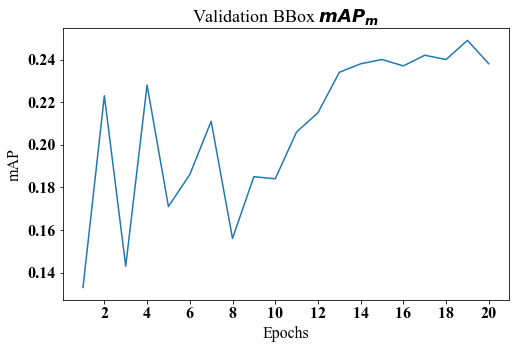

In [90]:
title = "Validation BBox mAP_m"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP_m"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Validation BBox $mAP_m$", fontdict={"fontsize":18})
save_fig(title)

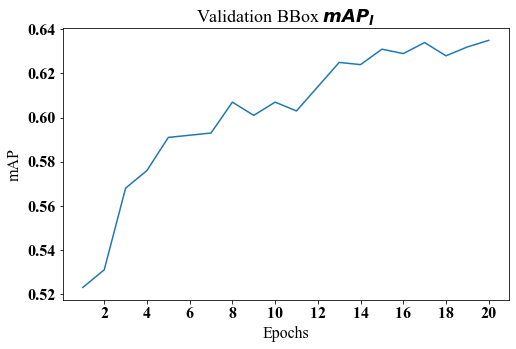

In [91]:
title = "Validation BBox mAP_l"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP_l"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Validation BBox $mAP_l$", fontdict={"fontsize":18})
save_fig(title)